# Load learned model
We deploy the learned model which have about 30,000 sample image's knowldege

In [2]:
import cv2
import matplotlib.pyplot as plt
import _pickle as cPickle
import numpy as np

#f = open("/home/jtlee/workspace/cancer_segmentation/ckpt/ckpt2_10.pkl", "rb")
#rf = cPickle.load(f)



## Show example that doesn't contains in Training set
First example is one of CT image, which can be input of model

Another one is label for the first. the white part means cancer

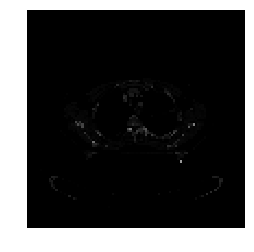

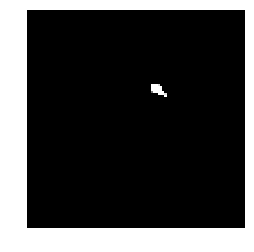

In [11]:
# Read image
target_name = "000047.dcm.png"
target_file = "/home/jtlee/workspace/cancer_segmentation/data/CT_PNG100/NSCLC-Radiomics/LUNG1-173/" + target_name
image = cv2.imread(target_file, cv2.IMREAD_GRAYSCALE)
image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

gt_name = "000047.dcm.gt.png"
gt_file = "/home/jtlee/workspace/cancer_segmentation/data/CT_PNG100/NSCLC-Radiomics/LUNG1-173/" + gt_name
gt_image = cv2.imread(gt_file, cv2.IMREAD_GRAYSCALE)
gt_image = cv2.cvtColor(gt_image, cv2.COLOR_GRAY2RGB)

plt.figure()
plt.axis("off")
plt.imshow(image)
plt.show()
plt.figure()
plt.axis("off")
plt.imshow(gt_image)
plt.show()

## Show result of above image
How looks like compare to above label? Is it reasonable?

In [ ]:
def context_feature(image, size = 3):
    if size % 2 == 0:
        raise NotImplementedError(" [!] Currently even size of context feature is not supporting!")
    padding = int(size / 2)
    shape = image.shape
    pad_image = np.zeros((shape[0] + padding*2, shape[1] + padding*2))
    pad_image[padding:-padding, padding:-padding] = image

    features = []
    for i in range(padding, shape[0]+padding):
        for j in range(padding, shape[1]+padding):
            feature = pad_image[i-padding:i+padding+1, j-padding:j+padding+1].reshape((-1))
            np.append(feature, [i, j]) # add location info
            features.append(feature)

    features = np.concatenate(features, axis = 0)
    features = features.reshape((-1, size**2))
    return features

In [57]:
# cancer detection
img = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE) # gray
img_shape = img.shape
flat = context_featue(image, size = 100)

pred = self.rf.predict(flat)
pred = pred.reshape((100, 100))

plt.figure()
plt.axis('off')
plt.imshow(pred)
plt.show()